Logistic Regression

 Predicting Employee Attrition Using Logistic Regression
   Dataset: HR Analytics Employee Attrition Dataset
   Preprocessing Steps:
     - Handle missing values if any.
     - Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
     - Standardize numerical features.
   Task: Implement logistic regression to predict employee attrition and evaluate the model using precision, recall, and F1-score.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv('hremployee.csv')
print(data)
print("\nDataset info\n")
data.info() 
print("\nTotal null values=\n", data.isnull().sum())

irrelevantColumns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
data = data.drop(columns=irrelevantColumns)

data = pd.get_dummies(data, columns=['Department', 'Gender', 'BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

X = data.drop('Attrition', axis=1)
y = data['Attrition']

y = y.map({'Yes': 1, 'No': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracyScore = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracyScore}')

precisionScore = precision_score(y_test, y_pred)
print(f'Precision Score: {precisionScore}')

recall = recall_score(y_test, y_pred)
print(f'Recall Score: {recall}')

f1Score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1Score}')


      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

Predicting Heart Disease Using Logistic Regression
   Dataset: Heart Disease Dataset
   Preprocessing Steps:
     - Handle missing values (e.g., fill missing values with mean).
     - Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
     - Standardize numerical features.
   Task: Implement logistic regression to predict heart disease and evaluate the model using accuracy and ROC-AUC.





In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

heartData = pd.read_csv('heart.csv')
print(heartData)
print(heartData.info())
heartData = pd.get_dummies(heartData, columns=['sex', 'cp'])

X = heartData.drop('target', axis=1)
y = heartData['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
yProb = model.predict_proba(X_test)[:,1]

accuracyScore = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracyScore:.2f}")

rocAucscore = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {rocAucscore:.2f}")



      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

5. Predicting Customer Satisfaction Using Logistic Regression
    Dataset: Customer Satisfaction Dataset
    Preprocessing Steps:
      - Handle missing values (e.g., fill missing values with median).
      - Encode categorical variables (e.g., one-hot encoding for region).
      - Standardize numerical features.
    Task: Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.




       Customer ID  Overall Delivery Experience (Rating)  \
0                1                                   5.0   
1                2                                   3.0   
2                3                                   4.0   
3                4                                   5.0   
4                5                                   2.0   
...            ...                                   ...   
10611        10612                                   4.0   
10612        10613                                   3.0   
10613        10614                                   5.0   
10614        10615                                   3.0   
10615        10616                                   1.0   

       Food Quality (Rating)  Speed of Delivery (Rating) Order Accuracy  
0                        3.0                         4.0            Yes  
1                        4.0                         3.0            Yes  
2                        5.0                         2.0 

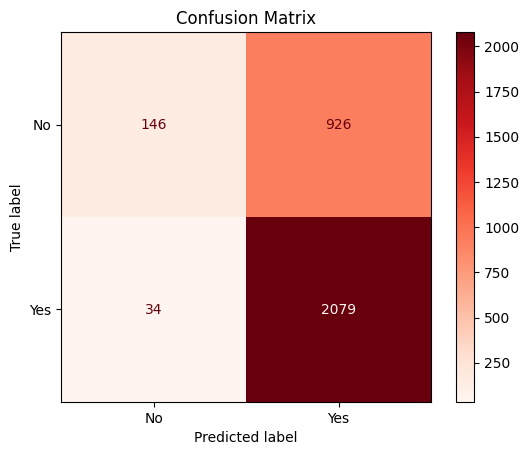

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

customerData = pd.read_csv('Customer-survey-data.csv')
print(customerData)
print(customerData.info())

customerData['Overall Delivery Experience (Rating)'].fillna(customerData['Overall Delivery Experience (Rating)'].mean(), inplace=True)
customerData['Food Quality (Rating)'].fillna(customerData['Food Quality (Rating)'].mean(), inplace=True)
customerData['Speed of Delivery (Rating)'].fillna(customerData['Speed of Delivery (Rating)'].mean(), inplace=True)

customerData = pd.get_dummies(customerData, columns=['Order Accuracy'], drop_first=True)

numerical_cols = ['Overall Delivery Experience (Rating)', 'Food Quality (Rating)', 'Speed of Delivery (Rating)']
scaler = StandardScaler()
customerData[numerical_cols] = scaler.fit_transform(customerData[numerical_cols])

X = customerData.drop('Order Accuracy_Yes', axis=1) 
y = customerData['Order Accuracy_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

confusionMatrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['No', 'Yes'])
display.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.show()


Decision Tree


Classifying Emails as Spam Using Decision Trees
    Dataset: Spam Email Dataset
    Preprocessing Steps:
      - Handle missing values if any.
      - Standardize features.
      - Encode categorical variables if present.
    Task: Implement a decision tree classifier to classify emails as spam or not and evaluate the model using precision, recall, and F1-score.




In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

emailsData = pd.read_csv('emails.csv')
print(emailsData)
print(emailsData.info())

X = emailsData['text']
y = emailsData['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_trainTfidf = vectorizer.fit_transform(X_train)
X_testTfidf = vectorizer.transform(X_test)

dtClassifier = DecisionTreeClassifier(random_state=42)

dtClassifier.fit(X_trainTfidf, y_train)

y_pred = dtClassifier.predict(X_testTfidf)

precisionScore = precision_score(y_test, y_pred)
print(f"Precision Score: {precisionScore:.2f}")

recallScore = recall_score(y_test, y_pred)
print(f"Recall Score: {recallScore:.2f}")

f1Score = f1_score(y_test, y_pred)
print(f"F1-Score: {f1Score:.2f}")
classReport = classification_report(y_test, y_pred)
print("Classification Report\n", classReport)


                                                   text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728

2. Classifying Credit Card Fraud Using Decision Trees
   Dataset: Credit Card Fraud Detection Dataset
   Preprocessing Steps:
     - Handle missing values if any.
     - Standardize features.
   Task: Implement a decision tree classifier to classify credit card transactions as fraud or not and evaluate the model using ROC-AUC and confusion matrix.




            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

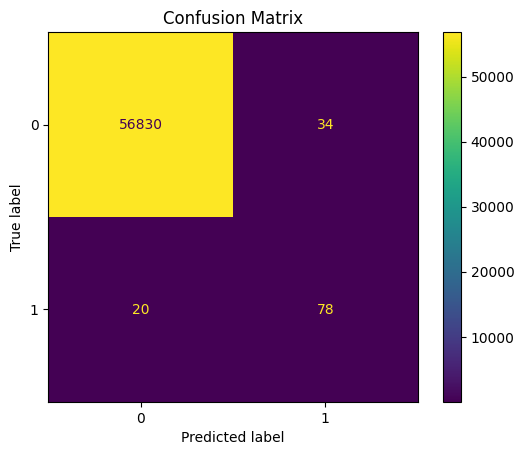

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv('creditcard.csv')
print(data)
print(data.info())

features = data.drop(columns=['Class'])
target = data['Class']

scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaledFeatures, target, test_size=0.2, random_state=42)

dtClassifier = DecisionTreeClassifier(random_state=42)
dtClassifier.fit(X_train, y_train)

y_pred = dtClassifier.predict(X_test)
y_pred_proba = dtClassifier.predict_proba(X_test)[:, 1]

rocAuc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {rocAuc:.2f}")

confMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=confMatrix, display_labels=dtClassifier.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()